**This notebook contains followings:**
* Data Merging
* Performing EDA
* Outlier Treatment
* Understanding the relationship btw variables
* Applying PCA 
* Model Applications

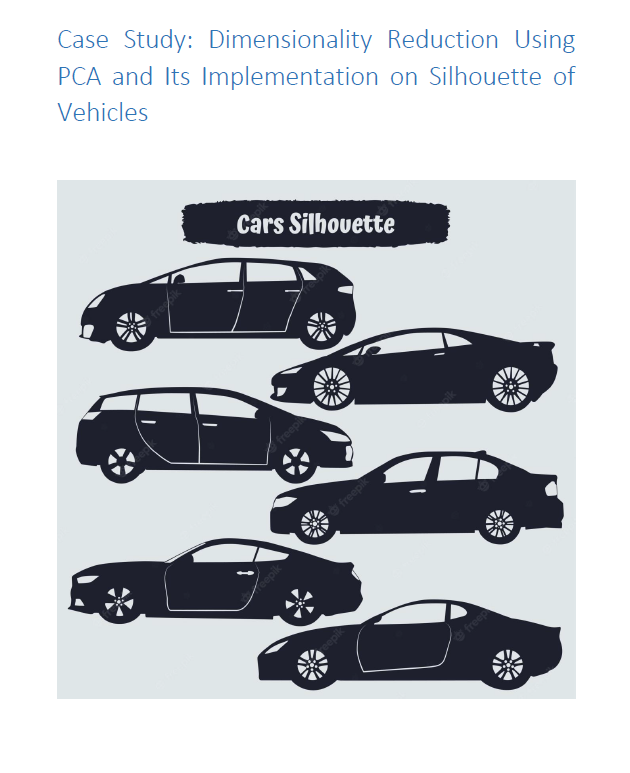

**What is PCA (Principal Component Analysis)?**
In the modern age of technology, amounts of data are increasing dramatically. Even though, having big amount of data always seems a good thing, it is not always a case that be wanted. Having too much features or dimensions at dataset might not be helpful to get accurate, reliable models. At a certain point, more dimensions can decrease model’s accuracy because of the multicollinearity. Because of multicollinearity, there is more data need to be generalized, this is known as the curse of dimensionality.
To understand why people label the downside of having many dimensions as a curse, we need to understand the multicollinearity.

**Multicollinearity**
Multicollinearity occurs when independent variables in model are correlated. This correlation between variables, in other words dimensions, can cause problem for fitting model and making interpretation.

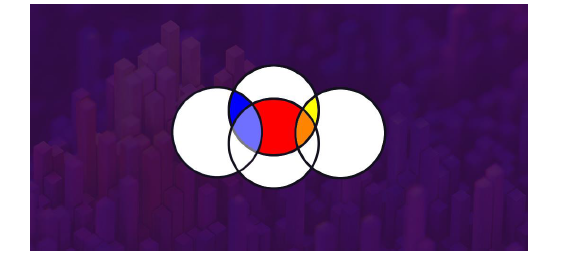

**Multicollinearity can cause two main problems;**
1. The coefficient estimates can be affected so wildly based on which other independent features are in the model. Coefficients can be sensitive to small changes in the model. That can be very frustrating when you do small changes in model and get dramatic different outcomes.
2. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

Therefore, we need to reduce the dimension to get rid of multicollinearity between the variables. There are several algorithms can be used to eliminate this problem such as PCA, t-SNE, etc. PCA is one of the most powerful among them. In this report, we will study on PCA to reduce dimensions



In [1]:
#lets start with importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

**Loading Dataset:**

In [2]:
df_cars = pd.read_csv("dataset/vehicle-2.csv")
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

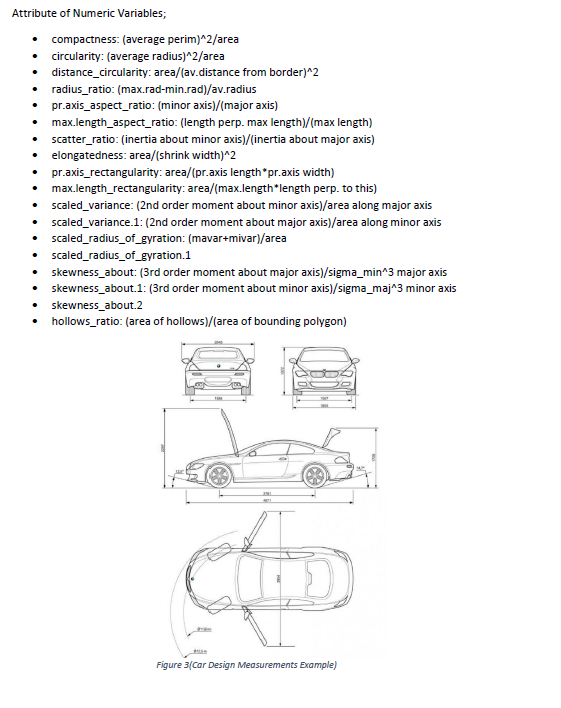


In [3]:
df_cars.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
# lets look at which kind of vehicle we have
print(df_cars["class"].unique())

['van' 'car' 'bus']


In [5]:
print(df_cars.dtypes)

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object


In [6]:
df_cars.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [7]:
#as we are going to use scilit-learn estimator, we need to do encoding categorical features to numerical array.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
columns = df_cars.columns
print(columns)
df_cars["class"] = le.fit_transform(df_cars["class"])
df_cars.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [8]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [9]:
#having a quick look at the data, there are some missing values
df_cars.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
df_cars.iloc[:,0:19]

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [11]:
# fill the na values with median values
from sklearn.impute import SimpleImputer

a = df_cars.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
transformed_values = imputer.fit_transform(a)
ts_df = pd.DataFrame(transformed_values)
ts_df.isnull().sum()
#I have checked filling the null values works or not.

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [12]:
ts_df

0     1      2      3      4     5      6     7     8      9      10  \
0     95.0  48.0   83.0  178.0   72.0  10.0  162.0  42.0  20.0  159.0  176.0   
1     91.0  41.0   84.0  141.0   57.0   9.0  149.0  45.0  19.0  143.0  170.0   
2    104.0  50.0  106.0  209.0   66.0  10.0  207.0  32.0  23.0  158.0  223.0   
3     93.0  41.0   82.0  159.0   63.0   9.0  144.0  46.0  19.0  143.0  160.0   
4     85.0  44.0   70.0  205.0  103.0  52.0  149.0  45.0  19.0  144.0  241.0   
..     ...   ...    ...    ...    ...   ...    ...   ...   ...    ...    ...   
841   93.0  39.0   87.0  183.0   64.0   8.0  169.0  40.0  20.0  134.0  200.0   
842   89.0  46.0   84.0  163.0   66.0  11.0  159.0  43.0  20.0  159.0  173.0   
843  106.0  54.0  101.0  222.0   67.0  12.0  222.0  30.0  25.0  173.0  228.0   
844   86.0  36.0   78.0  146.0   58.0   7.0  135.0  50.0  18.0  124.0  155.0   
845   85.0  36.0   66.0  123.0   55.0   5.0  120.0  56.0  17.0  128.0  140.0   

        11     12     13    14    15     16     17   18  
0    379.0  184.0   70.0   6.0  16.0  187.0  197.0  2.0  
1    330.0  158.0   72.0   9.0  14.0  189.0  199.0  2.0  
2    635.0  220.0   73.0  14.0   9.0  188.0  196.0  1.0  
3    309.0  127.0   63.0   6.0  10.0  199.0  207.0  2.0  
4    325.0  188.0  127.0   9.0  11.0  180.0  183.0  0.0  
..     ...    ...    ...   ...   ...    ...    ...  ...  
841  422.0  149.0   72.0   7.0  25.0  188.0  195.0  1.0  
842  368.0  176.0   72.0   1.0  20.0  186.0  197.0  2.0  
843  721.0  200.0   70.0   3.0   4.0  187.0  201.0  1.0  
844  270.0  148.0   66.0   0.0  25.0  190.0  195.0  1.0  
845  212.0  131.0   73.0   1.0  18.0  186.0  190.0  2.0  

[846 rows x 19 columns]

In [13]:
#create newdf from newvalues
column = a.columns
newdf = pd.DataFrame(transformed_values, columns = column)
newdf

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                     10.0          162.0   
1                    57.0                      9.0          149.0   
2                    66.0                     10.0          207.0   
3                    63.0                      9.0          144.0   
4                   103.0                     52.0          149.0   
..                    ...                      ...            ...   
841                  64.0                      8.0          169.0   
842                  66.0                     11.0          159.0   
843                  67.0                     12.0          222.0   
844                  58.0                      7.0          135.0   
845                  55.0                      5.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                      159.0   
1             45.0                    19.0                      143.0   
2             32.0                    23.0                      158.0   
3             46.0                    19.0                      143.0   
4             45.0                    19.0                      144.0   
..             ...                     ...                        ...   
841           40.0                    20.0                      134.0   
842           43.0                    20.0                      159.0   
843           30.0                    25.0                      173.0   
844           50.0                    18.0                      124.0   
845           56.0                    17.0                      128.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [14]:
newdf.isnull().sum()
#as you can see we dont have any missing values, now.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [15]:
#lets compute mean,median,min,max and std deviation for each quantitative variables
newdf.iloc[:,0:18].describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

**Quick Look on Descriptive Stats**

When we look at the mean and median of features, scatter_ratio, scaled_radius_of_gyration and scaled_variance.1 has a difference. That could be because of skewness/outlier




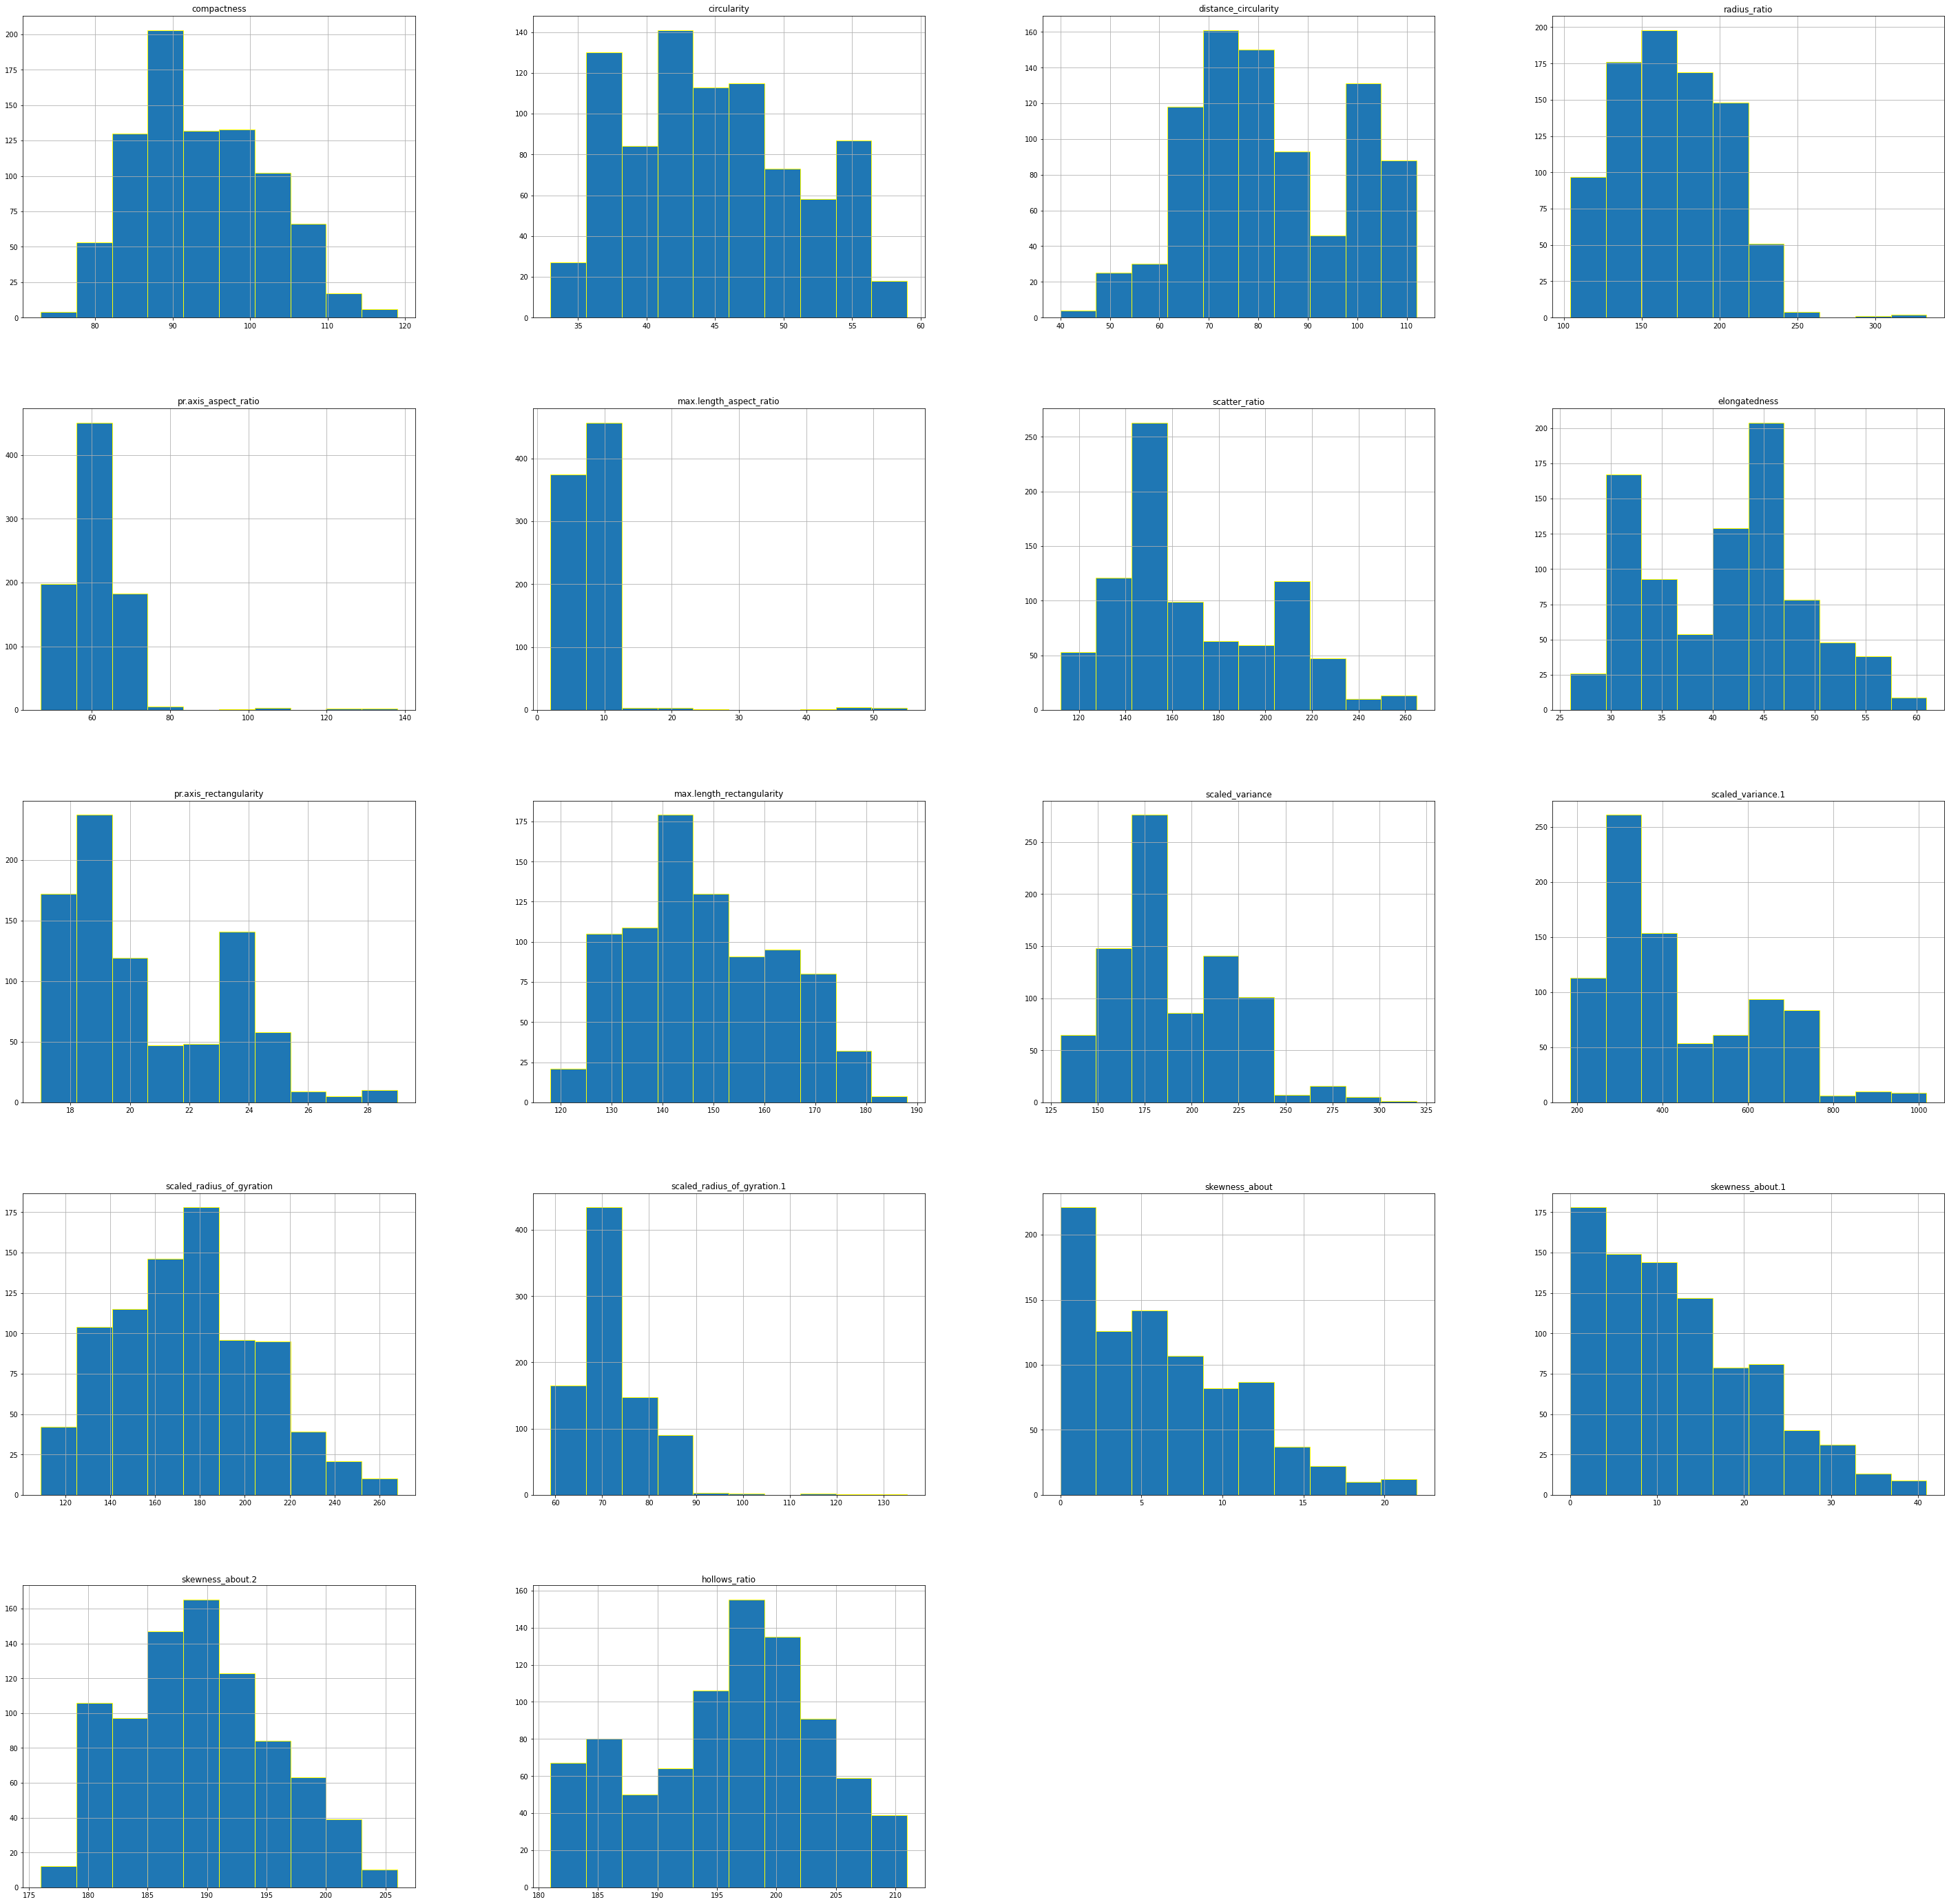

In [16]:
#lets look at all features's histograms

newdf.iloc[:,0:18].hist(bins = 10, figsize =(50,50), edgecolor = "yellow")
plt.show()

In [17]:
m = newdf.columns
m

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [18]:
list(enumerate(m))

[(0, 'compactness'),
 (1, 'circularity'),
 (2, 'distance_circularity'),
 (3, 'radius_ratio'),
 (4, 'pr.axis_aspect_ratio'),
 (5, 'max.length_aspect_ratio'),
 (6, 'scatter_ratio'),
 (7, 'elongatedness'),
 (8, 'pr.axis_rectangularity'),
 (9, 'max.length_rectangularity'),
 (10, 'scaled_variance'),
 (11, 'scaled_variance.1'),
 (12, 'scaled_radius_of_gyration'),
 (13, 'scaled_radius_of_gyration.1'),
 (14, 'skewness_about'),
 (15, 'skewness_about.1'),
 (16, 'skewness_about.2'),
 (17, 'hollows_ratio'),
 (18, 'class')]

**Comments on Histogram**:

Most of variables seems normally distributed. Pr.axis_aspect_ratio , max_length_aspect_ratio, scaled_ratio_hyration1 have some outliers.




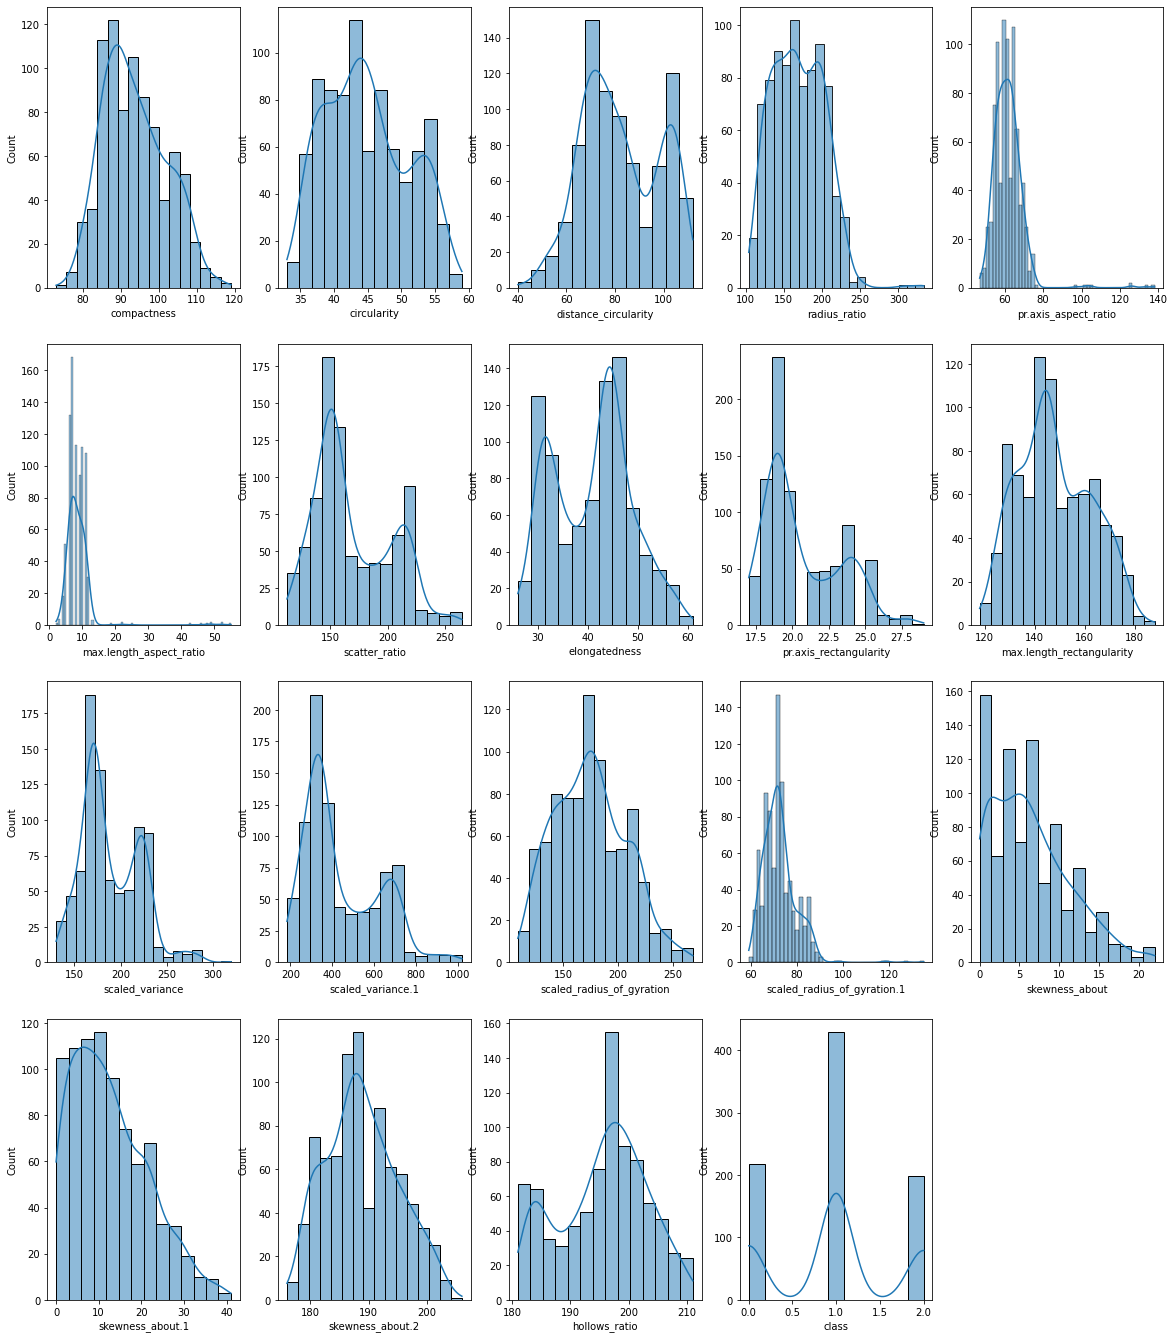

In [19]:
plt.figure(figsize = (20,30))
for i in enumerate(m):
    plt.subplot(5,5,i[0]+1)
    sns.histplot(data = newdf,
             x = newdf[i[1]],
            kde = True)

In [20]:
#lets look at the skewness of features
skewValues = newdf.skew()
skewValues

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

In [21]:
# check coef of variance
z = newdf.mean()
x = newdf.std()
x/z*100

compactness                     8.790144
circularity                    13.685279
distance_circularity           19.173542
radius_ratio                   19.778780
pr.axis_aspect_ratio           12.779721
max.length_aspect_ratio        53.706254
scatter_ratio                  19.656677
elongatedness                  19.083081
pr.axis_rectangularity         12.577796
max.length_rectangularity       9.807951
scaled_variance                16.628281
scaled_variance.1              40.175403
scaled_radius_of_gyration      18.629078
scaled_radius_of_gyration.1    10.309770
skewness_about                 77.074398
skewness_about.1               70.877991
skewness_about.2                3.256563
hollows_ratio                   3.802437
class                          71.826087
dtype: float64

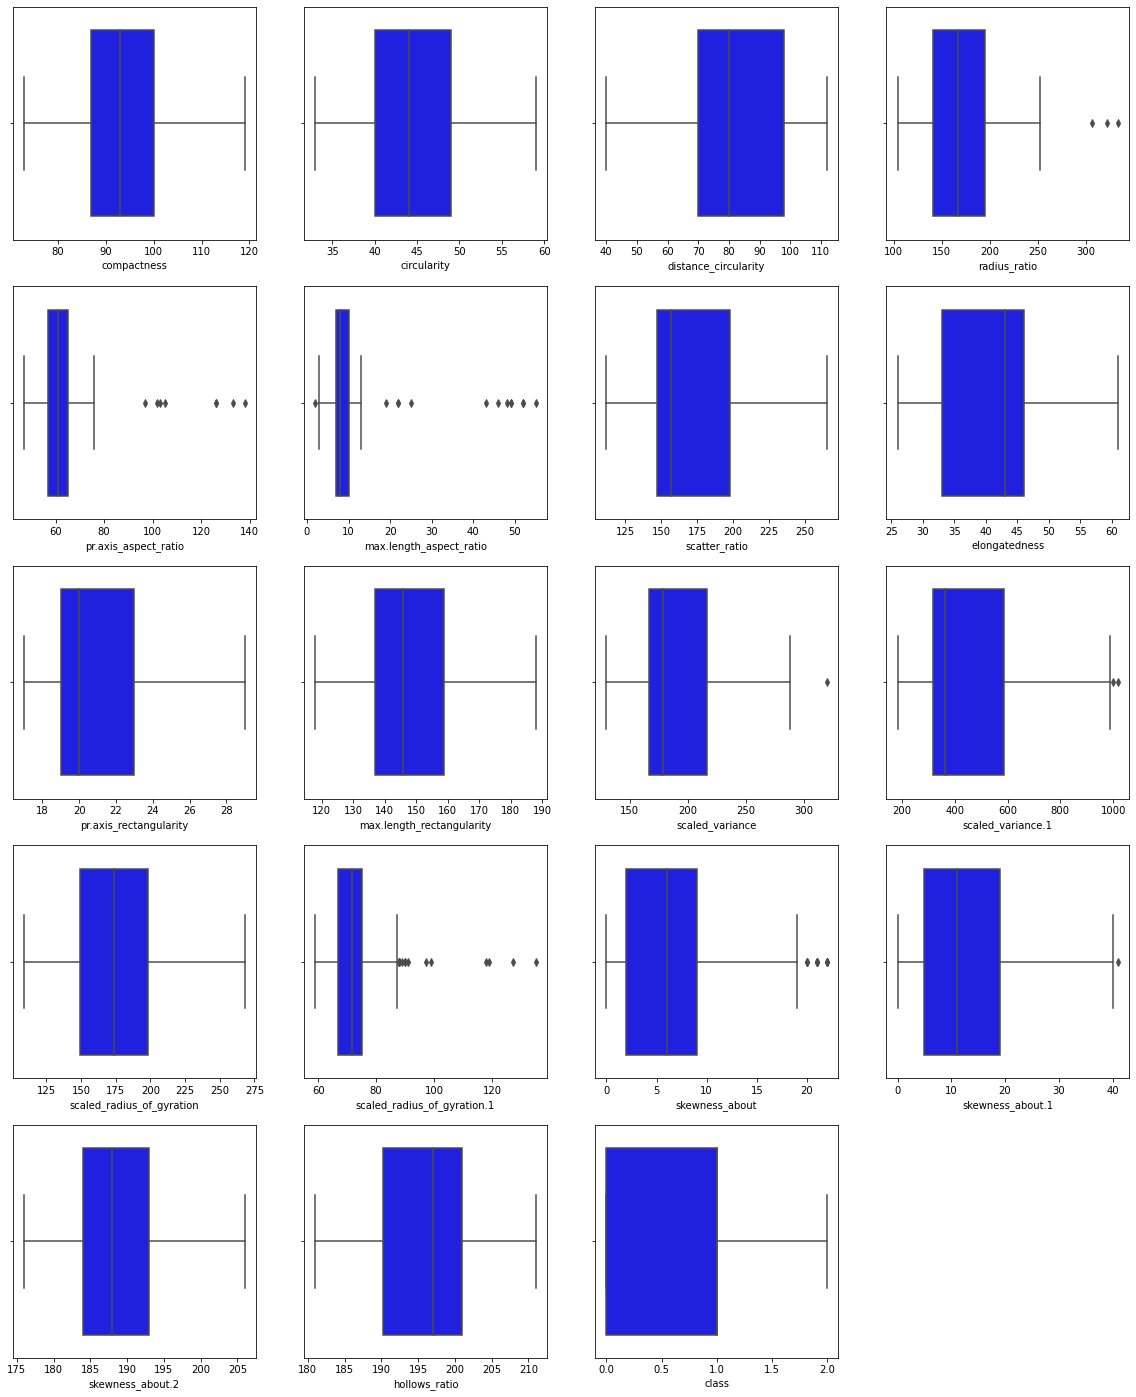

In [22]:
#lets look at the box plot of our features
plt.figure(figsize = (20,30))
for i in enumerate(m):
    plt.subplot(6,4,i[0]+1)
    sns.boxplot(data = newdf,
             x = newdf[i[1]],
            color = "blue")

<h2>Working on Outliers<h2>


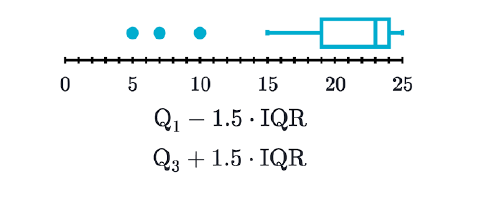



In [23]:
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [24]:
#lets look at outliers in our Dataset

outlierdf = newdf[((newdf > (Q3 + 1.5 * IQR)) | (newdf < (Q1 - 1.5 * IQR))).any(axis=1)]
outlierdf

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
44         119.0         54.0                 106.0         220.0   
47          85.0         42.0                  66.0         122.0   
79          89.0         44.0                  68.0         113.0   
85         110.0         58.0                 106.0         180.0   
100         82.0         45.0                  66.0         252.0   
113         88.0         35.0                  50.0         121.0   
123         90.0         36.0                  57.0         130.0   
127         85.0         41.0                  66.0         155.0   
132         97.0         42.0                 101.0         186.0   
135         89.0         47.0                  83.0         322.0   
190         97.0         48.0                  94.0         198.0   
230         85.0         35.0                  47.0         110.0   
291         89.0         45.0                  81.0         246.0   
346        117.0         52.0                 110.0         228.0   
381        106.0         54.0                 100.0         227.0   
388         94.0         47.0                  85.0         333.0   
391         91.0         38.0                  70.0         160.0   
400        107.0         53.0                 108.0         213.0   
498         88.0         36.0                  53.0         113.0   
505        115.0         53.0                 100.0         205.0   
516         92.0         42.0                  75.0         172.0   
523         90.0         43.0                  81.0         231.0   
544         88.0         43.0                  70.0         177.0   
623        106.0         52.0                 108.0         207.0   
655         86.0         35.0                  44.0         110.0   
706         82.0         43.0                  70.0         250.0   
761        115.0         51.0                 100.0         201.0   
796         85.0         38.0                  63.0         130.0   
797        111.0         53.0                 108.0         211.0   
815         81.0         45.0                  68.0         154.0   
835        111.0         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
44                   65.0                     12.0          213.0   
47                   54.0                      6.0          148.0   
79                   50.0                      7.0          150.0   
85                   51.0                      6.0          261.0   
100                 126.0                     52.0          148.0   
113                  58.0                      5.0          114.0   
123                  57.0                      6.0          121.0   
127                  65.0                     22.0          149.0   
132                  59.0                      9.0          186.0   
135                 133.0                     48.0          158.0   
190                  63.0                      9.0          181.0   
230                  55.0                      3.0          117.0   
291                 102.0                     43.0          155.0   
346                  65.0                     12.0          212.0   
381                  67.0                      4.0          250.0   
388                 138.0                     49.0          155.0   
391                  66.0                     25.0          140.0   
400                  64.0                     12.0          206.0   
498                  57.0                      3.0          118.0   
505                  64.0                     11.0          220.0   
516                  60.0                      8.0          147.0   
52

In [25]:
#lets create cleaned dataset from IQR
cleandf = newdf[~((newdf > (Q3 + 1.5 * IQR)) | (newdf < (Q1 - 1.5 * IQR))).any(axis=1)]
cleandf

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
5          107.0         44.0                 106.0         172.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                     10.0          162.0   
1                    57.0                      9.0          149.0   
2                    66.0                     10.0          207.0   
3                    63.0                      9.0          144.0   
5                    50.0                      6.0          255.0   
..                    ...                      ...            ...   
841                  64.0                      8.0          169.0   
842                  66.0                     11.0          159.0   
843                  67.0                     12.0          222.0   
844                  58.0                      7.0          135.0   
845                  55.0                      5.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                      159.0   
1             45.0                    19.0                      143.0   
2             32.0                    23.0                      158.0   
3             46.0                    19.0                      143.0   
5             26.0                    28.0                      169.0   
..             ...                     ...                        ...   
841           40.0                    20.0                      134.0   
842           43.0                    20.0                      159.0   
843           30.0                    25.0                      173.0   
844           50.0                    18.0                      124.0   
845           56.0                    17.0                      128.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
5              280.0              957.0                      264.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
5                           85.0             5.0               9.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

**Lets Plot The Box Plot After Removal of Outliers:**

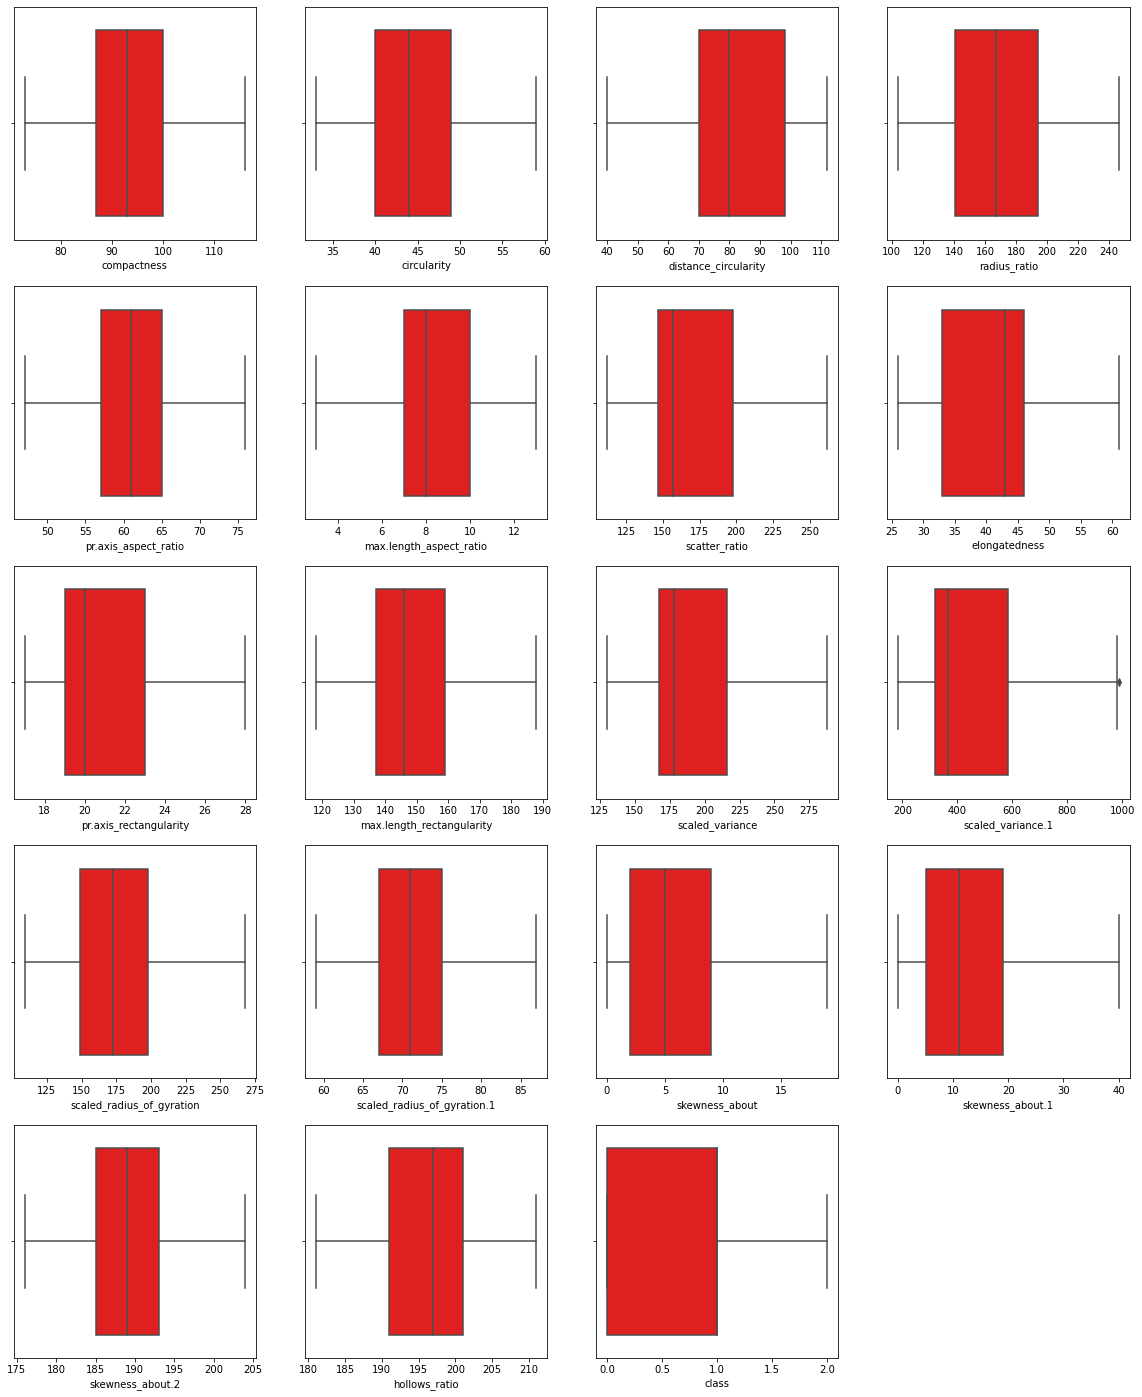

In [26]:
#lets look at the box-plots of cleaned dataset
plt.figure(figsize = (20,30))
for i in enumerate(m):
    plt.subplot(6,4,i[0]+1)
    sns.boxplot(data = cleandf,
             x = cleandf[i[1]],
            color = "red")
    
#as we can see, there are not any outliers

**Understanding the relationship btw variables**




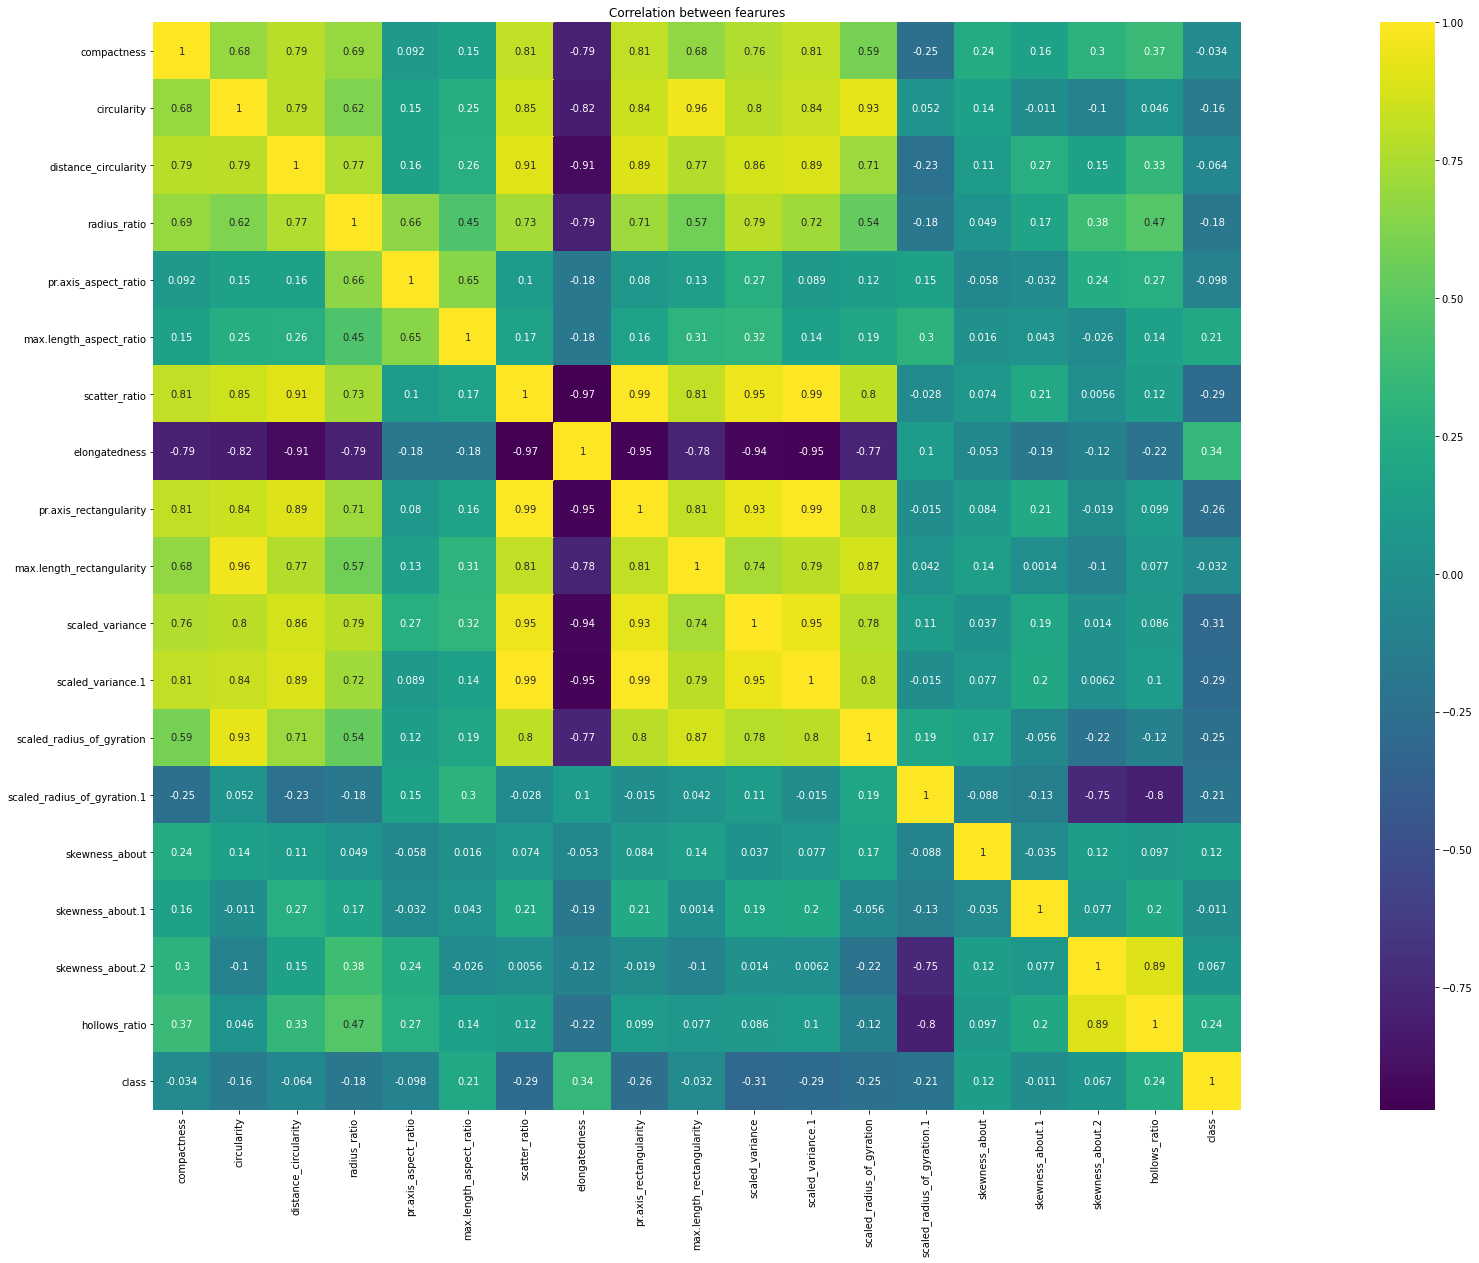

In [27]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between fearures')
    plt.show();
    
correlation_heatmap(newdf, 50,20)

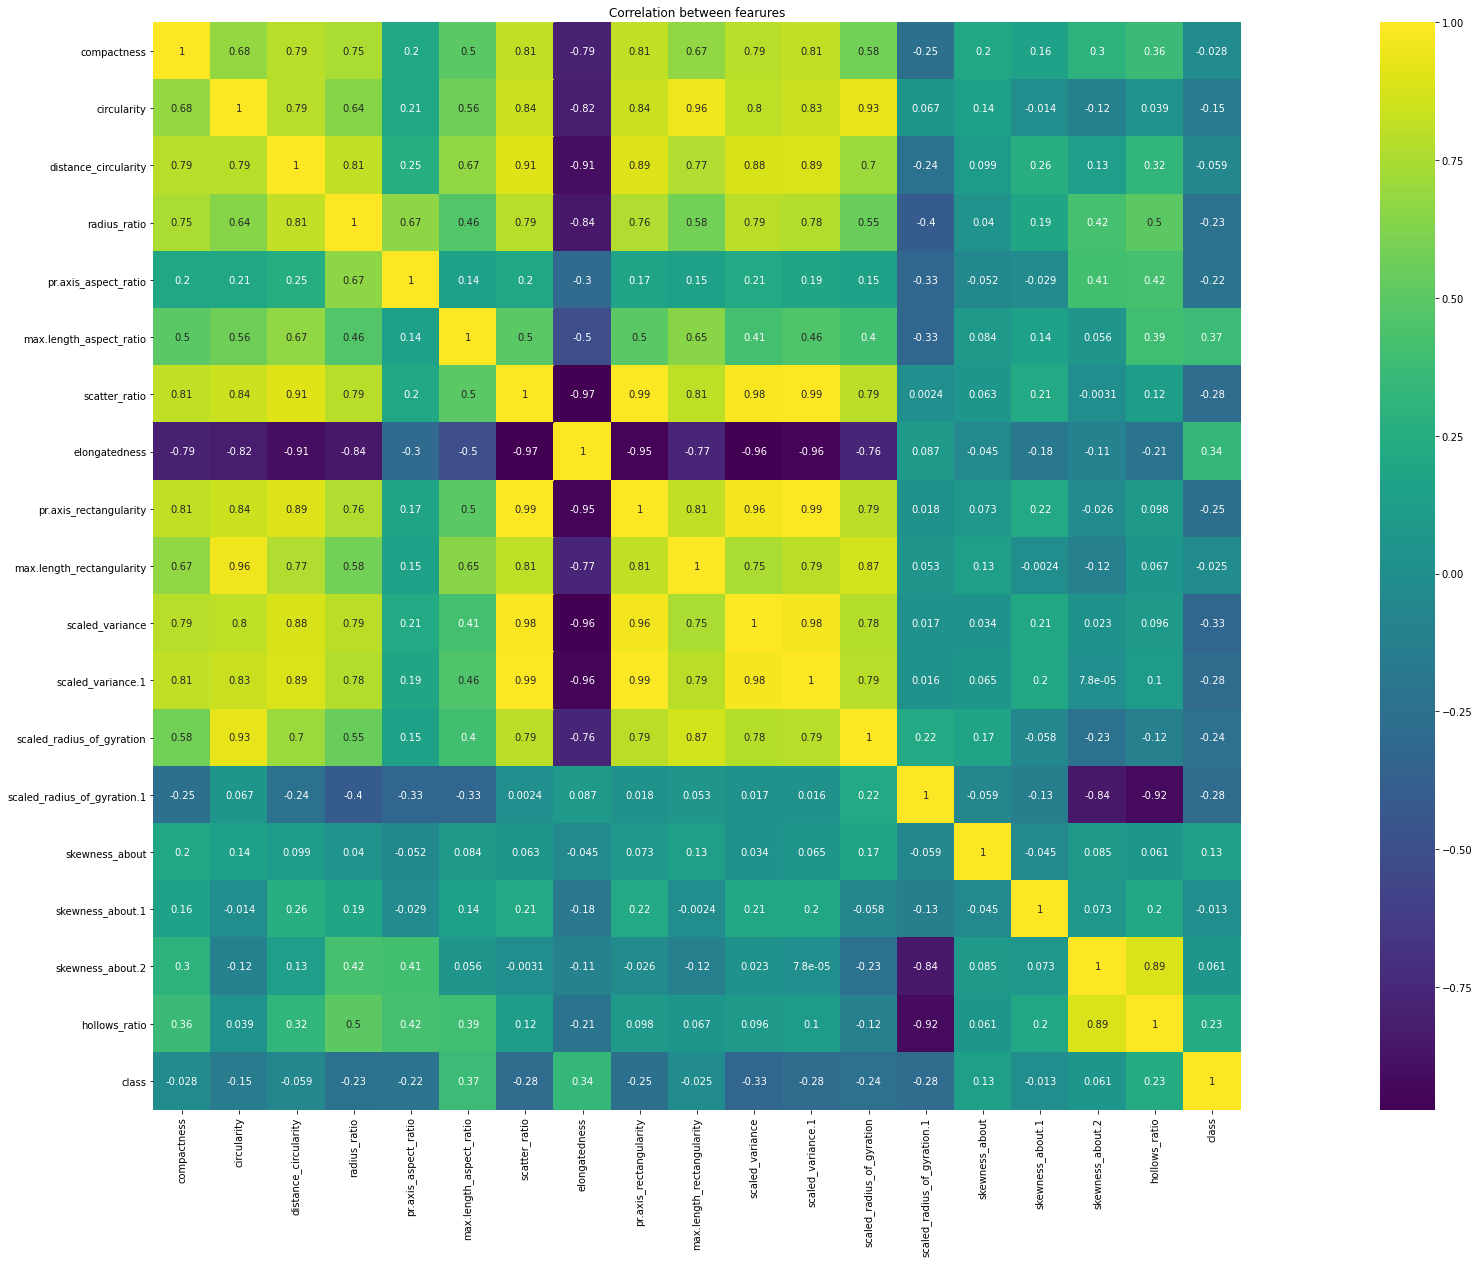

In [28]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between fearures')
    plt.show();
    
correlation_heatmap(cleandf, 50,20)

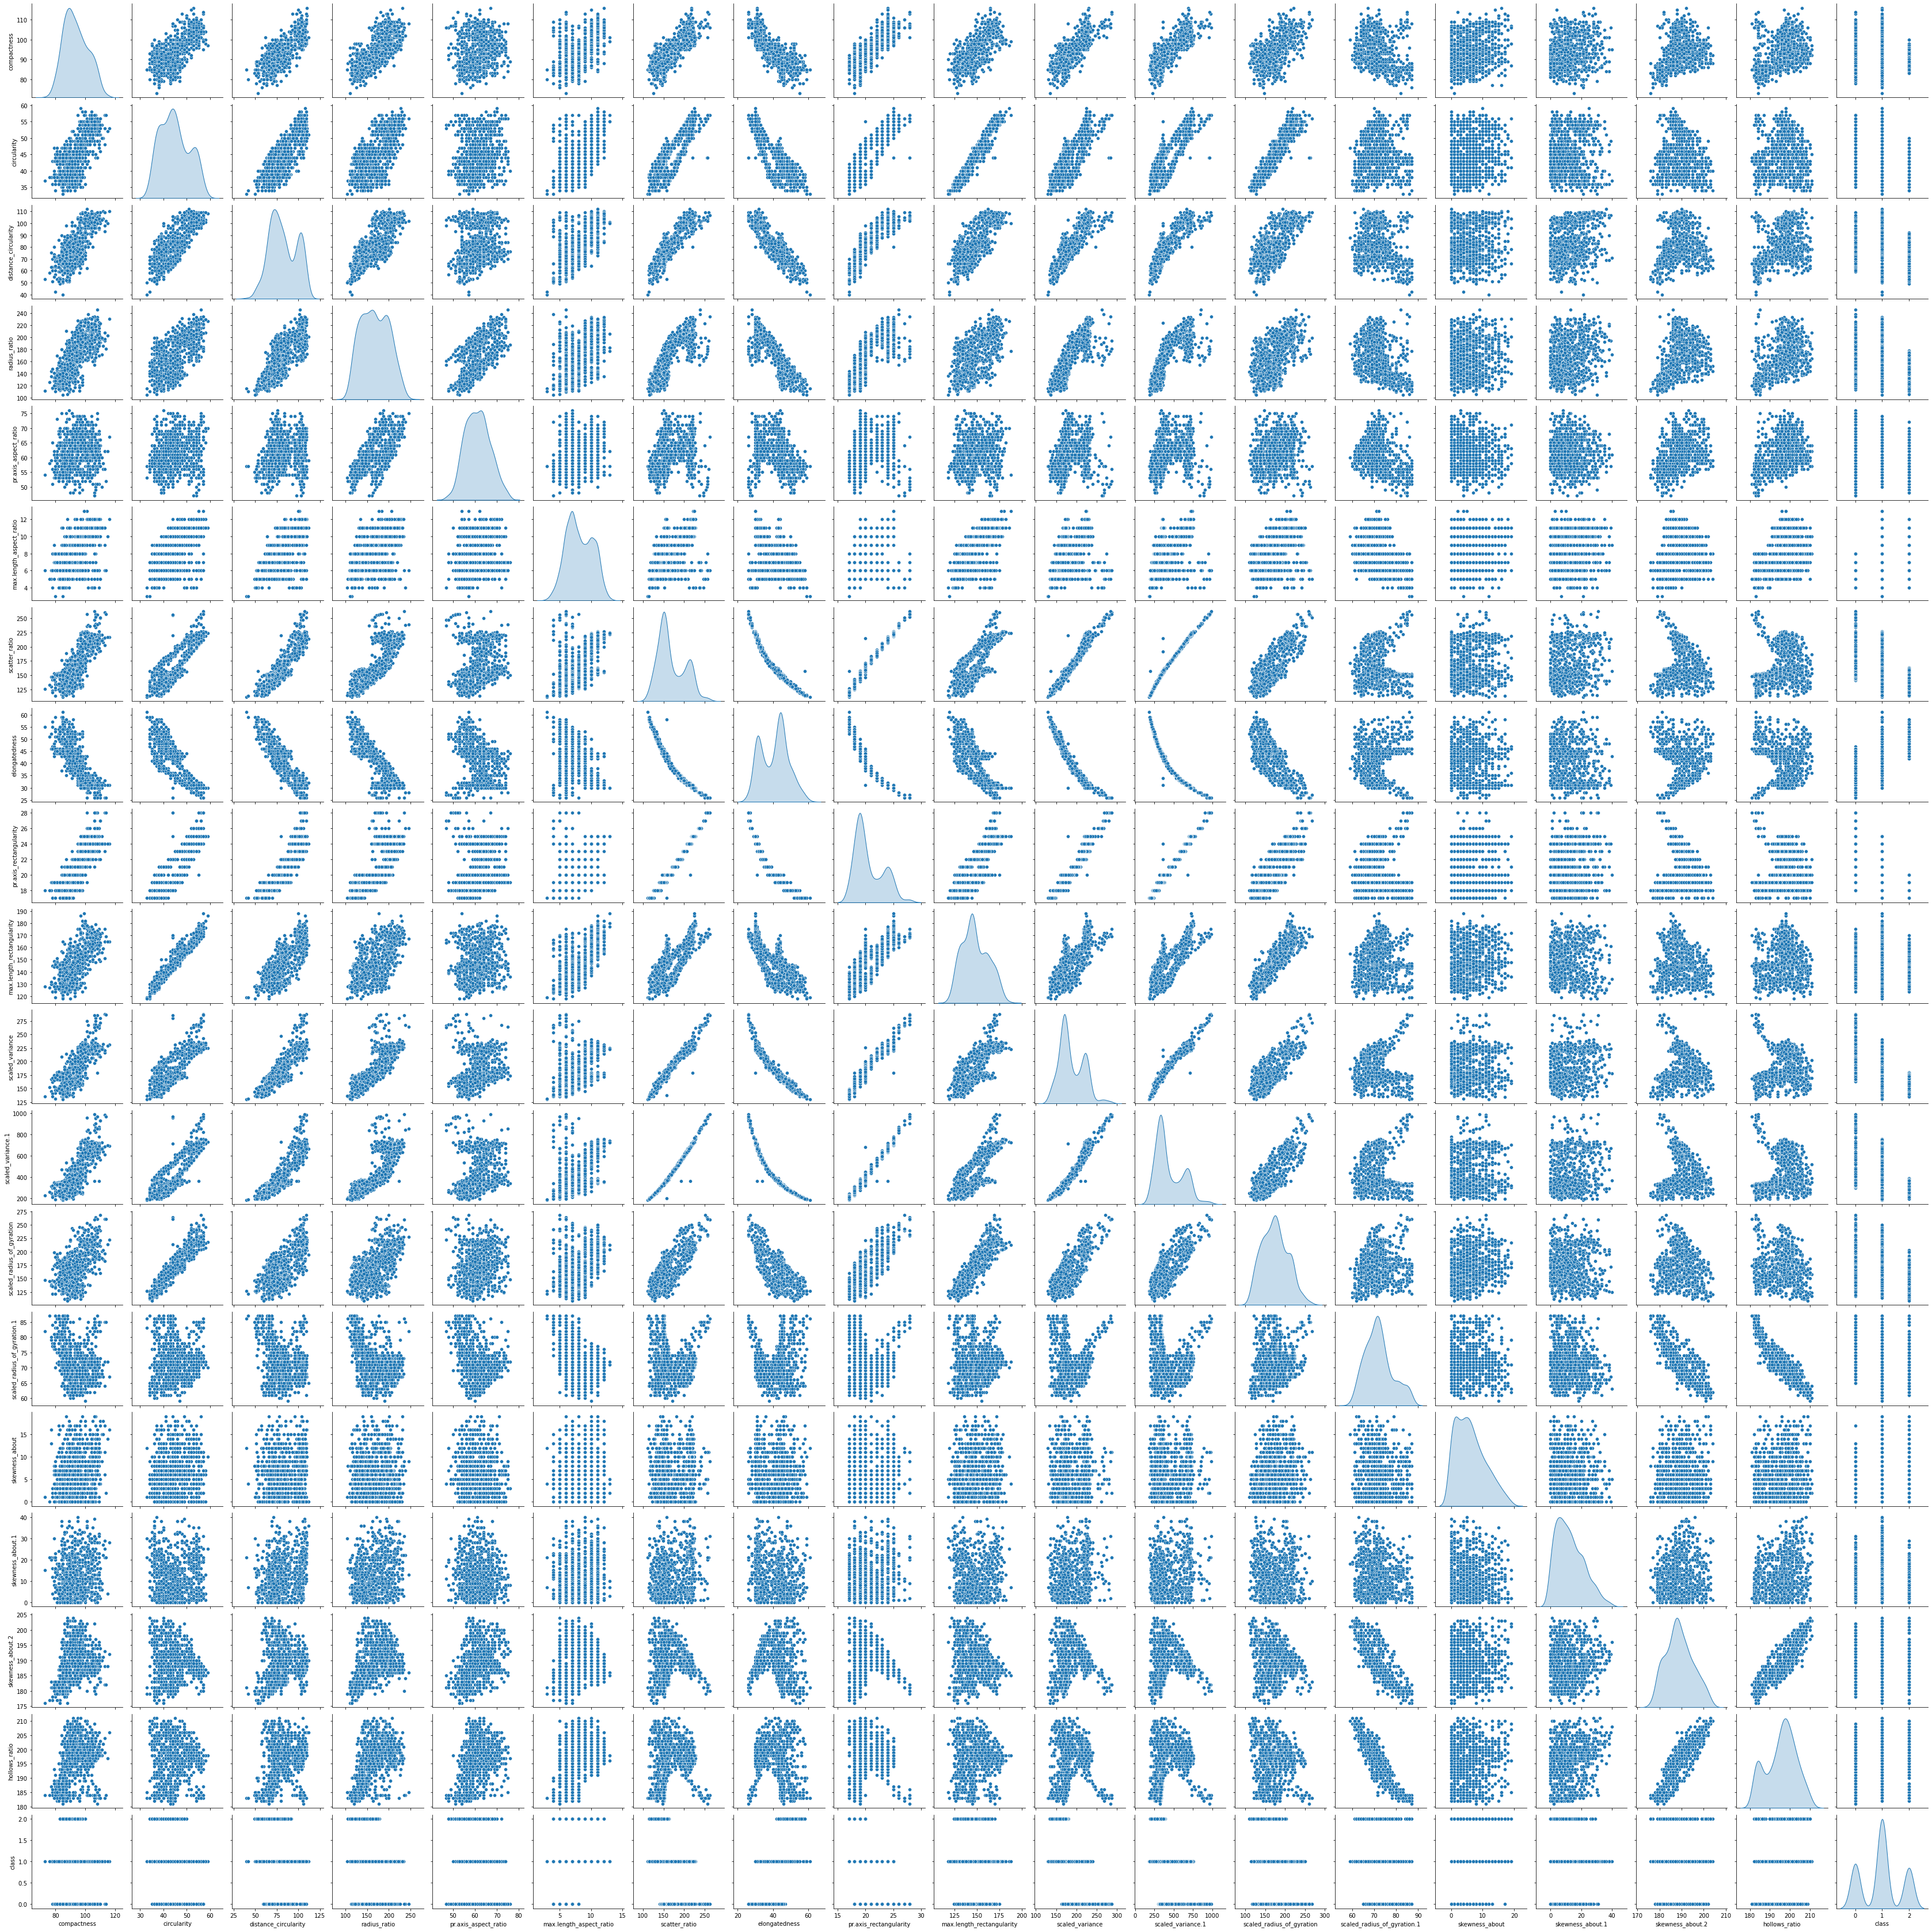

In [29]:
sns.pairplot(cleandf, diag_kind="kde")

**Multicollinearity**
Multicollinearity occurs when independent variables in model are correlated. This correlation between variables, in other words dimensions, can cause problem for fitting model and making interpretation.

There are some multicollinearity between some variables like pr_axis_rectangularity and scaled_radius_of_gydration... 



C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


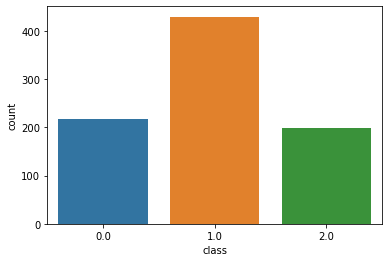

In [56]:
#display how many are car,bus,van. 
newdf['class'].value_counts()

splitscaledf = newdf.copy()
sns.countplot(newdf['class'])
plt.show()

**Lets start to do PCA**
Principal Component Analysis (PCA) is an unsupervised linear transformation technique that helps to identify patterns in data based on the correlation between features. PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

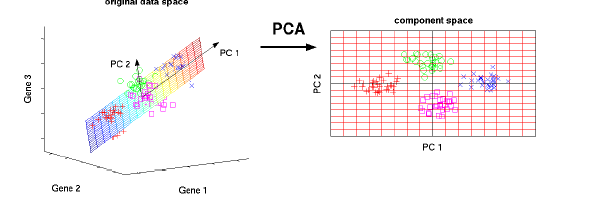


Before starting PCA algorithm, let’s summarize logic behind it and its steps;
1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
6. Construct a projection matrix W from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

In [31]:
#now separate the dataframe into dependent and independent variables

X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [57]:
from sklearn.preprocessing import StandardScaler
#Lets normalize all independent variables.
sc = StandardScaler()
X_std =  sc.fit_transform(X)  

In [58]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

In [59]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [60]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088707, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524633, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389672, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450192, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.0

In [61]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

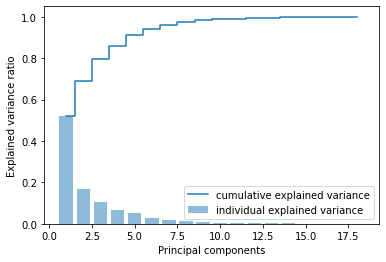

In [62]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

**Comment on Principal Components**

We can see 9 principal compenent can explain approx. %95 of total variance. Therefore, we would reduced dimension to 9. 


In [63]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:9])  

X_std_9D = np.dot(X_std,P_reduce.T)   

reduced_pca = pd.DataFrame(X_std_9D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884  -0.197213  1.444958 -1.065425  0.820179 -0.041563   
842 -0.314956 -0.164511  -0.794573  0.908272  0.235492 -1.438257 -0.599113   
843  4.809174  0.001249  -0.532333 -0.295652  1.344236 -0.217070  0.573249   
844 -3.294092  1.008276   0.357003  1.933675 -0.042768 -0.402491 -0.202406   
845 -4.765053 -0.334900   0.568136  1.224807  0.054051 -0.335637  0.058098   

            7         8  
0    0.381106  0.866310  
1   -0.247059 -0.147250  
2   -0.482772  0.310833  
3    0.023086  0.026363  
4    0.448854 -2.087385  
..        ...       ...  
841 -0.506991  0.304265  
842  0.153086  0.306854  
843 -0.110478  0.652536  
844 -0.320622  0.201263  
845  0.248035  0.429904  

[846 rows x 9 columns]

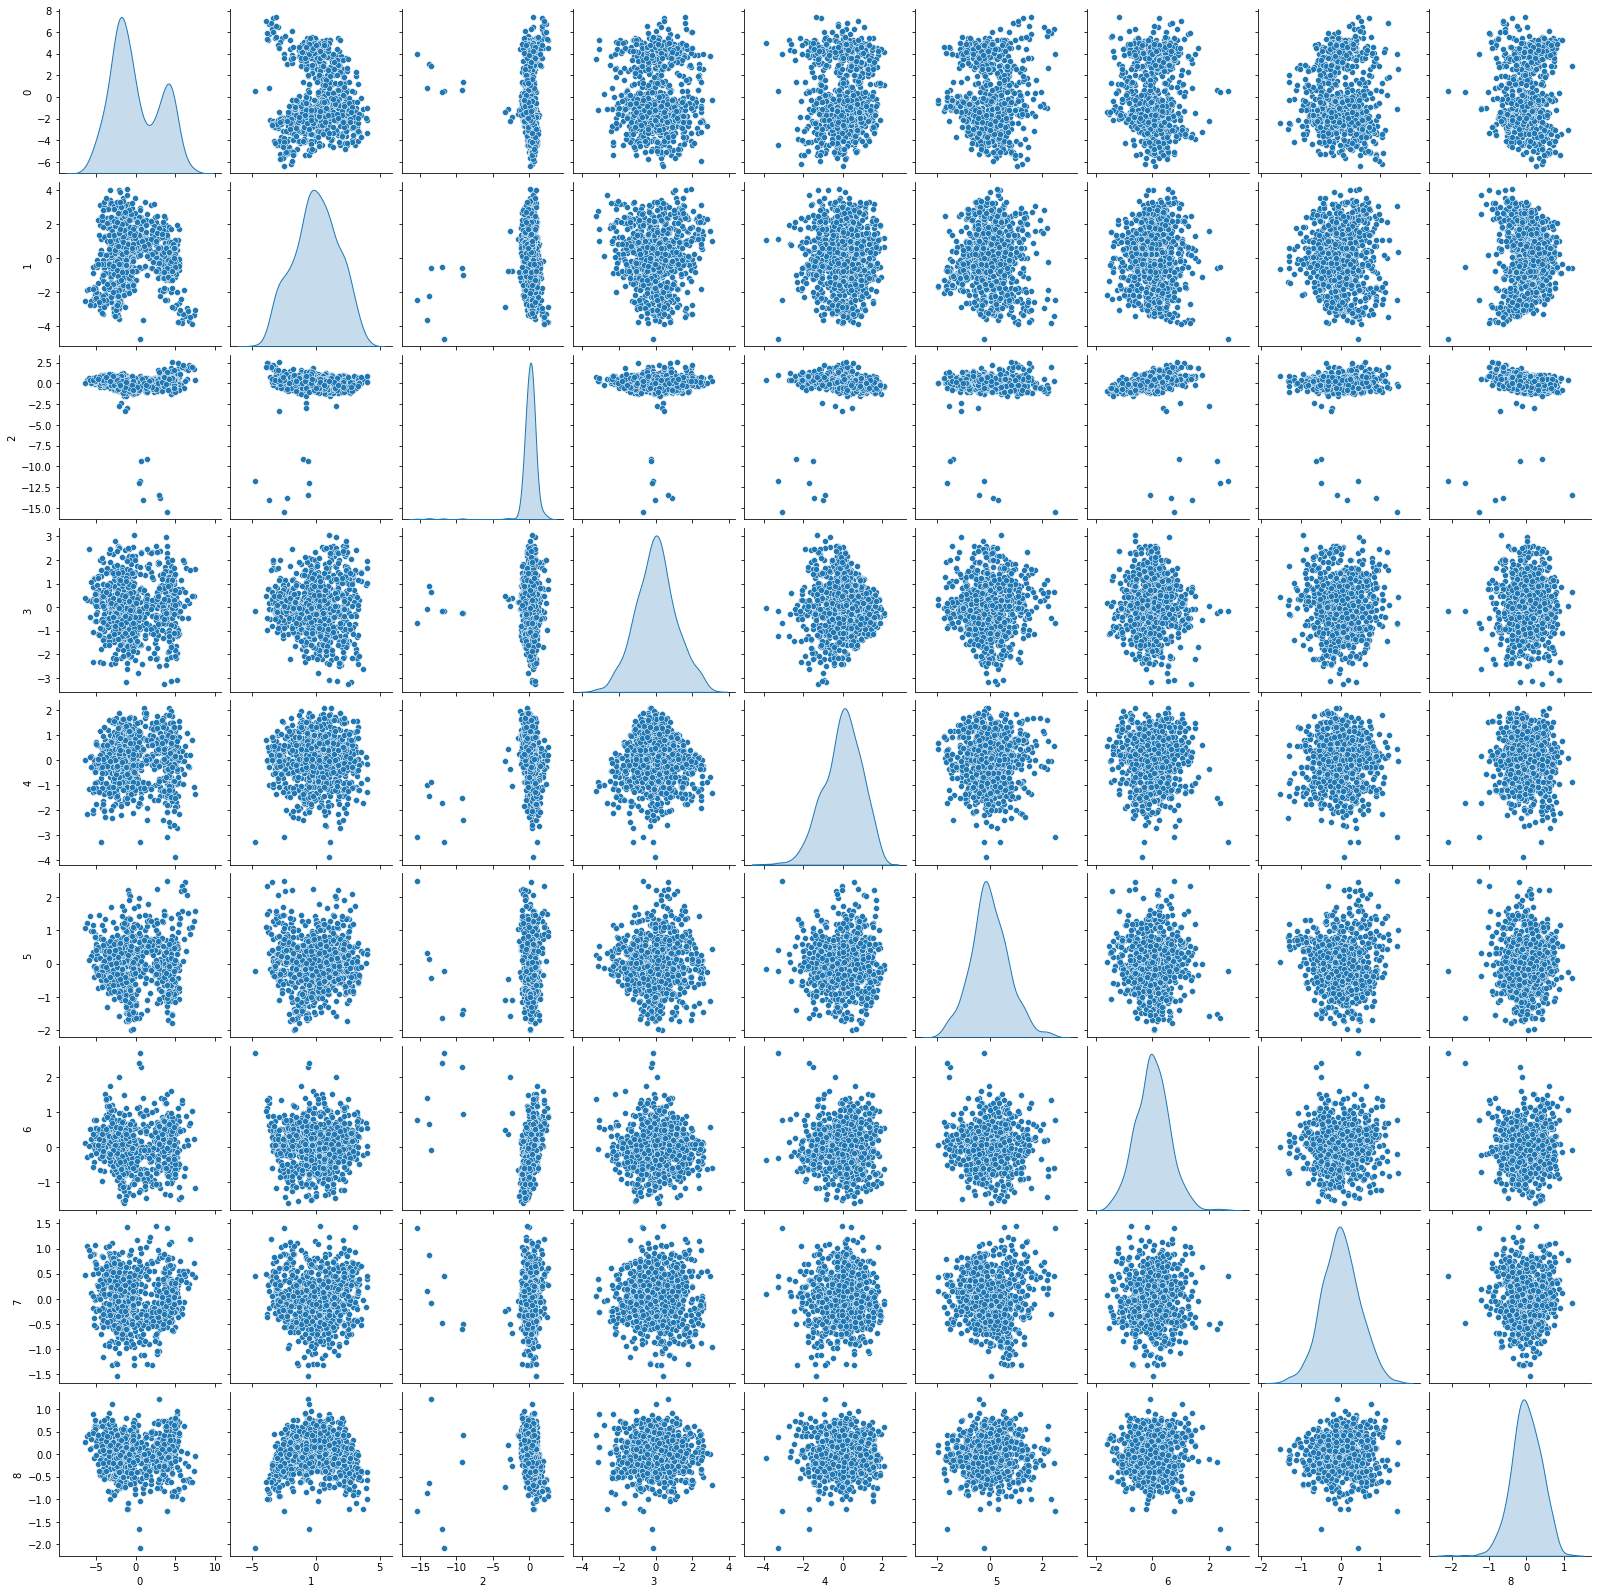

In [64]:
# lets check out new pairplot after reducing dimension
sns.pairplot(reduced_pca, diag_kind='kde') 
#sns.pairplot(reduced_pca1, diag_kind='kde') 

**As we can see above graph, we do not have multicollinearity anymore.**

**Model**




In [68]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)
#pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca1,y,test_size=0.30,random_state=1)

In [69]:
svc = SVC() #instantiate the object
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.9488188976377953
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.9488188976377953


In [72]:


#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        59
         1.0       0.98      0.96      0.97       133
         2.0       0.92      0.89      0.90        62

    accuracy                           0.95       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.95      0.95       254



**Another way of doing PCA with sklearn with simple example by using two correlated variable**



In [79]:
df1 = cleandf[["pr.axis_rectangularity", "scatter_ratio"]]
df1

pr.axis_rectangularity  scatter_ratio
0                      20.0          162.0
1                      19.0          149.0
2                      23.0          207.0
3                      19.0          144.0
5                      28.0          255.0
..                      ...            ...
841                    20.0          169.0
842                    20.0          159.0
843                    25.0          222.0
844                    18.0          135.0
845                    17.0          120.0

[813 rows x 2 columns]

In [80]:
df1.corr().round(2)

pr.axis_rectangularity  scatter_ratio
pr.axis_rectangularity                    1.00           0.99
scatter_ratio                             0.99           1.00

In [81]:
df1.cov()

pr.axis_rectangularity  scatter_ratio
pr.axis_rectangularity                6.520062      82.822177
scatter_ratio                        82.822177    1074.636471

In [82]:
import numpy as np
from sklearn.decomposition import PCA
pcs = PCA(n_components=2)
pcs.fit(cleandf[["pr.axis_rectangularity", "scatter_ratio"]])
pc1 = pcs.explained_variance_ratio_[0]
pc2 = pcs.explained_variance_ratio_[1]
print(pc1)
print(pc2)
print(6/(1074+6))

0.9998740679613939
0.00012593203860621622
0.005555555555555556


In [83]:
data = {"pc1" : [0.9998740679613939],
       "pc2" : [0.00012593203860621622]}
pc_df = pd.DataFrame(data)
pc_df

pc1       pc2
0  0.999874  0.000126

**Conclusion**
We almost get same accuracy and F1 score at original dataset and our dimensions-reduced dataset. It's a good sign for not losing model performance. Therefore, it can be said that PCA is great tool to make our model perfrom better, and can increase the models performance both in terms of processing speed and the ease of implementing it


